In [1]:
%load_ext autoreload
%autoreload 2

import sys
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import rasterio

sys.path.append('..')
import pymoon
from pymoon.config import *

In [ ]:
tex_arr = rasterio.open(PATH_LROC_COLOR_2K).read([1, 2, 3]).astype(int)
tex_arr = np.moveaxis(tex_arr, 0, -1)  # Normalize to [0, 1]


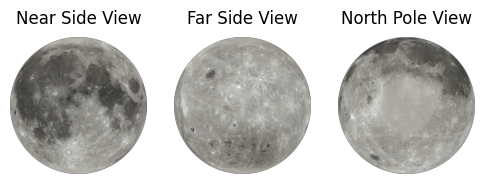

In [22]:
img1 = pymoon.main.render_moon_face(tex_arr, None, obs_vec=(0, 0, 1))
img2 = pymoon.main.render_moon_face(tex_arr, None, obs_vec=(0, 0, -1))
img3 = pymoon.main.render_moon_face(tex_arr, None, obs_vec=(0, 1, 0))

fs, r = 6, 1
fig, axs = plt.subplots(1, 3, figsize=(fs * r, fs))
plt.subplots_adjust(hspace=0.4)

axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(img3)

titles = [
    "Near Side View",
    "Far Side View",
    "North Pole View",
]

for i, ax in enumerate(axs):

    ax.set_xticks([])
    ax.set_yticks([])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    ax.set_title(
        titles[i],
        fontsize=12,
        pad=10, 
    )

save_filename = "lunar_disk_different_views.png"
save_folder = "plots_for_doc"  # Update this to your desired save path
plt.savefig(f"{save_folder}/{save_filename}", bbox_inches="tight", dpi=300)
plt.show()